# Bestäm feluppskattningen för ert experiment
av Jacob Blomqvist, Malmö Universitet

## Inledning och felfortplantning
I denna [jupyter notebook](https://jupyter.org/index.html) kommer vi gå igenom dels felfortplantning direkt ifrån givna felgränser, och dels genom att utgå ifrån spridningsmåttet standardavvikelsen. Vi kommer att använda oss av Python både för att generera figurer och för att modellera våra "experiment". Har ni frågor kring installering och dylikt så är det bara att kontakta författaren.

---

När man utför mätningar så medför instrumentens precision, eller brist på densamma, att resultatet av mätningen endast kan anges med någon felgräns. 
Om vi är ute efter att ta fram ett värde på någon fysikalisk kvantitiet, som beror på andra storheter och konstanter, så ges precisionen i resultatet på osäkerheten i alla dessa in-data. 
Vi behöver ett sätt att räkna ut osäkerheten för vår ut-data som en funktion på osäkerheten för övriga in-data - den så kallade felfortplantningen, *propagation of error* på engelska.

Om vi har ett fel på vår indata, $dx = x - \mu$ i relation till ett exakt medelvärde $\mu$, så fortplantar detta sig till ett fel i vår beräknade storhet $dx \rightarrow df $ på något vis beroende på hur $f$ beror på indatan.

### Differentiering
Låt oss betrakta en funktion $f(x) = kx$, där $k$ är en konstant. Vi vet att förstaderivatan av $f(x)$ med avseende på $x$ ges av: $\frac{df}{dx} = k$. Derivatan berättar för oss *hur funktionen f(x) ändras då x ändras*. På motsvarande vis kan vi få fram variationen, eller *differentialen* av $f$ (med avseende på $x$): 

$$df = \left( \frac{\partial{f}}{\partial{x}}\right) dx \qquad \qquad \qquad \qquad \qquad (1)$$

Med vår funktion, ovan, kommer ekv. (1) att bli:  $df = k\cdot dx$

### Flera variabler...
Man kan utveckla ekv (1) till att gälla generellt för en storhet eller funktion av mer än en variabel på följande vis:

$$df(x, y, z,\dotsc) = \left( \frac{\partial{f}}{\partial{x}}\right)_{y,z,\dots} dx +\left( \frac{\partial{f}}{\partial{y}}\right)_{x,z,\dotsc} dy + \left( \frac{\partial{f}}{\partial{z}}\right)_{x,y,\dots} dz + \cdots, \qquad  (2) $$

där paranteserna i ekv. (2) utgör partialderivatorna där alla övriga variabler hålls konstanta.

#### Exempel: 
$$f(x,y) = 2x^2y$$


$$df = \left( \frac{\partial{f}}{\partial{x}}\right)_{y}dx + \left( \frac{\partial{f}}{\partial{y}}\right)_{x}dy = 4xy dx + 2x^2dy $$

Ekvationerna (1) och (2) ovan utgör 1:a ordningens approximation på absolutdiffensen på funktionsvärdet med avseende på absolutdifferensen på variablerna. Vi låter exemplet ovan konkretisera detta på följande vis.

Om man vid en individuell mätning får fram ett värde på *x* och ett värde på *y* som på grund av mätosäkerheten ligger lite ifrån, *dx* = -0.1 och *dy* = +0.2, de sanna värdena, *x* = 1.0, *y* = 2.0, så kommer funktionsvärdet enligt ekv. (2) avvika ifrån sitt sanna värde, *f* = 4.0, med *df* = 4$\cdot$1.0$\cdot$2.0$\cdot$(-)0.1 + 2$\cdot$1$\cdot$0.2 = -0.4. Vi kan kontrollera detta genom direkt insättning av mätvärdena i funktionen: $\Delta$*f* = *f*(*x*=0.9,*y*=2.2) - *f*(*x*=1, *y*=2) = -0.436. Vi kommer väldigt nära och den lilla skillnaden man ändå observerar kommer ifrån att vi begränsat oss till 1:a ordningens approximation, dvs. vi använder oss bara av första-derivatorna i vår differentiering.

### Approximativ övre gräns för osäkerheten på utdata från osäkerheten på indata
Ett exempel ifrån mekaniken får illustrera hur detta kan användas. Spänningen, $\sigma$, i en komponent då denna utsätts för en töjningen, $\varepsilon = \Delta L/L_0$, kan för vissa fall beräknas enligt: $\sigma = E\varepsilon$, där $E$ är materialparametern E-modul. Säg att vi har ett tabellerat värde på E-modul med felgräns, *E* = 200 $\pm$ 5 MPa och vi mäter upp en töjning med felgräns till: $\varepsilon$ = 0.1 $\pm$ 0.01. Vi kan då använda ekv. (2) för att uppskatta felgränsen för vår beräknade spänning: $d\sigma = \varepsilon\cdot$ 5 + *E*$\cdot$ 0.01 = 0.1$\cdot$ 5 + 200$\cdot$ 0.01 =  2.5 MPa. Spänningen med felgräns kan alltså uppskattas till: $\sigma$ = 20 $\pm$ 2.5 MPa. 

Observera att detta sätt att använda felgränserna på in-datan endast ger ett övre värde på ut-datans felgräns, orsaken är att vi inte tar hänsyn till möjligheten att olika fel tar ut varandra. I nästa avsnitt så hanterar vi detta. 

## Statistik för mätningar
### Normalfördelningen
Från statistiken så kan man se att alla mätningar man utför tenderar ligga utspritt runt ett medelvärde, $\mu$, enligt en normalfördelningskurva (se figuren som pythonkoden genererar nedan). 

In [1]:
# Ladda pythonbibliotek
# Raden nedan gör att numpy och matplotlib är importerade
# på ett vis som gör att vi t.ex. kan skriva plot(...), exp()
# och linspace() direkt. Vi nehöver endast göra detta en gång i vår jupyter notebook
%pylab inline

# seaborn är ett matplotlib-baserat bibliotek som gör det
# lätt att plotta fina figurer med enkla förval. Man kan t.ex.
# ändra style till "dark" eller "whitegrid" osv. och context till
# 'poster' eller dylikt.
import seaborn as sns
sns.set(context='notebook', style='white')

Populating the interactive namespace from numpy and matplotlib


Text(12.2,12,'FWHM $ = (2\\sqrt{2ln(2)})\\sigma \\approx 2.35\\sigma$')

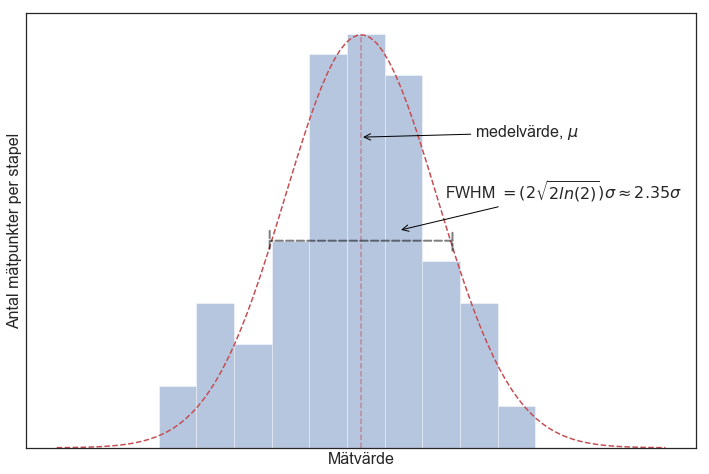

In [2]:
# plotta normalfördelningskurva

def gcurve(amp, my, width):
    '''Vi skapar en hjälpfunktion för att enklare
    generera och plotta normalfördelningskurvor.
    '''
    x = linspace(my-4*width,my+4*width, 100)
    y = amp/(width*sqrt(2*pi))*exp(-0.5*((x-my)/(width))**2)
    plot(x, y, 'r--')
    
# parametervärden för vår kurva
my = 10.0
sigma = 2.
amp = 100.

# random.seed() gör att för undervisningsbruk kan man frysa
# vår slumptalsgenerator så att den alltid visar samma värden
random.seed(2)

# Det finns olika sätt att dra normalfördelade slumptal
# här gör vi på detta vis och längre ner på ett annat.
y = sigma*random.randn(100)+my

# Öppna upp en figur som vi kan lägga in vår plot i
# Detta är ej nödvändigt men gör det lätt att kontrollera
# t.ex. storleken på figuren.
figure(1, figsize=(12,8))

# distplot skapar ett histogram
sns.distplot(y, kde=False, bins=10)
gcurve(amp, my, width=sigma)

ylabel('Antal mätpunkter per stapel', fontsize=16)
xlabel('Mätvärde', fontsize=16)
xticks([])
yticks([])

# vi kan lägga in text och extra grafiska element
# i vår plot
fwhm = sqrt(2*log(2))
ax = my - fwhm*sigma
dax = 2*fwhm*sigma
ay = 10.

plot([my, my], [0, 20], 'r--', alpha=0.5)
annotate("", xy=(ax-0.1,ay), xytext=(ax+dax+0.1, ay),
        arrowprops=dict(arrowstyle='|-|',
                        linestyle='--',
                        linewidth=2.,
                        color='black', alpha=0.5))

annotate(r'medelvärde, $\mu$', xy=(my,15), xytext=(13,15), fontsize=16,
         arrowprops=dict(arrowstyle ='->',
                         color='black'))
annotate(r'FWHM $ = (2\sqrt{2ln(2)})\sigma \approx 2.35\sigma$', xy=(my + 1. ,10.5),
         fontsize=16, xytext=(12.2,12),
         arrowprops=dict(arrowstyle ='->',
                         color='black'))

# Vi kan spara vår figur
#savefig('normal.png', dpi=200)

### Standardavvikelse och varians

Ett vanligt mått på spridningen av mätvärden runt ett medelvärde är *standardavvikelsen*, $\sigma$, eller approximationen till densamma som brukar betecknas $s$, samt kvadraten på standardavvikelsen, den sk. *variansen*, $s^2$. 

$$standardavvikelse: s = \sqrt{\frac{1}{N-1}\sum{(y_i-\mu)^2}}$$
$$varians: s^2 = \frac{1}{N-1}\sum{(y_i-\mu)^2} \qquad\qquad (3) $$

Orsaken till att vi dividerar med $N-1$ och inte $N$ är att vårt medelfel ökar med antalet parametrar som vi söker. Medelvärdet är t.ex. 1 parameter, och vi har $N-1$ *frihetsgrader* att finna detta ifrån $N$ mätpunkter.

Observera att standardavvikelsen och variansen är mått på spridningen som mätmetoden har inbyggt i sig. *Oavsett hur många mätningar vi gör så kommer vi ha samma spridning av resultatet*.  Det är *inte* ett mått på felet, eller osäkerheten, på ett beräknat *medelvärde*. Medelvärdets precision ökar istället med antal mätpunkter eftersom slumpmässigheten gör att många mätningars fel tar ut varandra. 

### Precisionen ökar med kvadratroten av antalet mätningar
Det visar sig att storleken på osäkerheten på medelvärden minskar med kvadratroten ur antalet mätpunkter,
$$felgräns(\mu) \propto \frac{1}{\sqrt{N}}, \qquad\qquad (4) $$ så att om du t.ex. vill halvera storleken på felgränserna så måste du ha 4 gånger så många mätpunkter. Ekv. (4) är en viktig tumregel som är bra att komma ihåg. 

### Konfidensintervall/Felgränser
Konfidensintervall (CI), dvs. felgränser, kan anges på olika vis. Ibland använder man någon multipel av standardavvikelsen, t.ex. $\sigma$ eller $2\sigma$. Men då vi vet att osäkerheten på vårt medelvärde minskar med antal mätpunkter så anges felgränserna ofta med en så kallad konfidensnivå, t.ex. 95%, på följande vis. 

1. Bestäm först vilken konfidensnivå, $\alpha$ (t.ex. 68%, 90%, 95%, 99% osv.)
2. Beräkna aritmetiska medelvärdet för datapunkterna $\mu = \sum_i {x_i}/N$
3. Ta fram standarfelet (*standard error (SE) på engelska*) för medelvärdet: $SE = s/\sqrt{N}$, där *s* fås via ekv. (3).
4. Slå upp (dubbelsidig) Student T-faktor, *T*, för antalet frihetsgrader och kvartil, *p* = (1-$\alpha$/2). Detta görs idag enkelt genom att söka på Student T table eller dylikt på nätet, eller t.ex. genom att använda ett pythonbibliotek som vi gör i ett exempel längre ned.
5. CI = $\mu \pm T\cdot SE$

Student T-faktorn kompenserar för bristen på oändligt många mätpunkter. Vi vet ju inte om våra mätpunkter av en slump råkar ligga mer på ena sidan av sanna medelvärdet. I vissa tabeller slår man direkt på konfidensnivån (t.ex. 95%), i andra anges det från kvartilen (1 - 0.95/2 = 0.025) och ytterligare andra använder (1-*p* = 0.975).

Konfidensintervall kan tolkas på följande vis. Om man reproducerar mätningarna många gånger kommer medelvärdet på de uppmätta punkterna ligga inom konfidensintervallet 95% av gångerna. Alternativt kan vi säga att *vi, givet avsaknad av systematiska fel, är 95% konfidenta att det sanna värdet på koncentrationen ligger inom det givna intervallet.*


### Exempel: Konfidensintervall på medelvärde
Man har mätt upp koncentrationen Cu$^{2+}$-joner i ett prov till *c* = 0.150 mol/liter och bestämt standardavvikelsen, *s* = 0.042 mol/liter, genom att utföra 20 oberoende mätningar. Vi vill ta fram 95%:igt konfidensintervall runt medelvärdet. Vi slår upp vår T-faktor, $T_{0.975, 19}$ = 2.093, och bestämmer konfidensintervallet till *CI* = $\pm$ 2.093$\cdot$0.042/$\sqrt{19}$ = $\pm$ 0.020, och resultatet till: *c* = 0.15 $\pm$ 0.020 mol/l.


### Övningsuppgift
En mätning har givit följande mätvärden: (0.609, 0.537, 0.444, 0.546, 0.424, 0.467, 0.487, 0.576, 0.453, 0.449, 0.485).

1. Bestäm medelvärdet och standardavvikelsen.
2. Ange 95%:ig konfidensintervall.

Lösning plus jämförelse med resultat ifrån pythonbibliotek visas nedan.

In [3]:
# svar
datapunkter = array([0.609, 0.537, 0.444, 0.546, 0.424, 0.467, 0.487, 0.576, 0.453, 0.449, 0.485])

# medelvärde
my = sum(datapunkter)/11
my2 = mean(datapunkter)

#standardavvikelse
s = sqrt((sum((datapunkter-my)**2))/10)
#jämför med numpys std (obs ddof=1 för N-1 frihetsgrade)
s2 = std(datapunkter, ddof=1)

# T-faktor för 95% och 10 frihetsgrader
T = 2.228 #slår upp från tabell

# jmf med scipy istället
from scipy import stats
T2 = stats.distributions.t.ppf(1 - 0.05/2., 10)

#konfidensintervall
CI = T*s/sqrt(11)

#jmf med scipy
CI2,_,_ = stats.bayes_mvs(datapunkter, alpha=0.95)

# skriv ut medelvärde och standardavvikelse
print(17*'-'+'RESULTAT'+17*'-')
print(f'Medelvärde = {round(my, 3)}')
print(f'Medelvärde numpy = {round(my2, 3)}')
print(f'Standardavvikelse = {round(s, 4)}')
print(f'Standardavvikelse numpy = {round(s2, 4)}')

# skriv ut resultat för konfidensintervall
print(f'T-faktor för p = 0.025 och 11-1 frihetsgrader = {T}')
print(f'T-faktor från scipy = {round(T2, 3)}')
print(42*'-')

# skriv ut konfidensintervallen
print(f'95% konfidensintervall = [{round(my - CI, 3)}...{round(my + CI, 3)}]')
print(f'95% konfidensintervall med scipy = [{round(CI2.minmax[0], 3)}...{round(CI2.minmax[1], 3)}]')


-----------------RESULTAT-----------------
Medelvärde = 0.498
Medelvärde numpy = 0.498
Standardavvikelse = 0.0602
Standardavvikelse numpy = 0.0602
T-faktor för p = 0.025 och 11-1 frihetsgrader = 2.228
T-faktor från scipy = 2.228
------------------------------------------
95% konfidensintervall = [0.457...0.538]
95% konfidensintervall med scipy = [0.457...0.538]


## Totala standardavvikelsen som funktion av flera variabler

Vi går tillbaka till ekv. (2) och funderar på hur vi kan applicera detta på ett spridningsmått som standardavvikelsen. Vi tänker oss att vi utför en mätning flera gånger. Varje gång så ligger resultatet något värde över eller under ett teoretiskt medelvärde pga. metodens eller instrumentens (brist på) precision. Vi kan beräkna mätning *i:s* avvikelse, $dx_i$, ifrån medelvärdet, $\mu$, via $dx_i = \mu - x_i$. På motsvarande sätt så har vi $dy_i$, och $dz_i$ osv. avvikelsen för andra mätstorheters värden för mätning nummer *i* jämfört med deras respektive medelvärden. För att göra om ekv. (2) till ett uttryck relaterat till standardavvikelsen så utför vi två operationer: 

1. Kvadrera höger och vänsterled,
2. Ta summan av $N$ mätningar, 

När man kvadrerar ekv. (2) så expanderas högerledet till kvadratiska termer i enkilda variabler samt parvisa korstermer enligt:

$$(df)^2  = \left( \frac{\partial{f}}{\partial{x}}\right)^2 dx^2 +2\left( \frac{\partial{f}}{\partial{x}}\right) \left( \frac{\partial{f}}{\partial{y}}\right) dx dy + \cdots \qquad \qquad (5) $$

Eftersom vi är intresserad av *medelvärdet* av storleken på avvikelsen för många mätningar (dvs. standardavvikelsen!) så kan vi summera vänster- och högerledet över alla $N$ mätresultat. Dividerar man med $N-1$ kommer vi få termer av typen:

$$s_f^2 = \frac{1}{N-1}\sum_i^N (df_i)^2  = \frac{1}{N-1}\sum_{i}^N\left[ \left( \frac{\partial{f}}{\partial{x}}\right)^2 dx_i^2 +2\left( \frac{\partial{f}}{\partial{x}}\right) \left( \frac{\partial{f}}{\partial{y}}\right) dx_i dy_i + \cdots\right], \qquad \qquad (6) $$

där vi även använt definitionen av variansen $s^2$, ekv. (3).

### Korstermerna tar ut varandra för icke-korrelerade variabler
De kvadratiska termerna i ekv. (6) kommer alltid att vara positiva så summan av dessa måste vara större än noll. Korstermerna kommer däremot att ta ut varandra när vi ökar antalet mätningar då avståndet till medelvärdet slumpmässigt antingen är positivt eller negativt (se t.ex. figuren ovan). Om man skall vara noggrann gäller detta bara om de olika mätstorheterna (x, y, z osv.) inte är korrelerade på något vis utan oberoende av varandra, men under dessa förutsättningar så kommer endast de kvadratiska termerna vara kvar: 

$$s_f^2 \approx \frac{1}{N-1}\sum_{i}^N\left[ \left( \frac{\partial{f}}{\partial{x}}\right)^2 dx_i^2+ \left( \frac{\partial{f}}{\partial{y}}\right)^2 dy_i^2+\dotsc \right] \qquad\qquad (7)$$

Observera att termerna liknande dessa: $\left( \frac{\partial f}{\partial x}\right)$ i ekv (6 och 7) betyder partial-derivatan av $f$ med avseende på $x$, och är en matematisk operation och beror inte på mätningen som sådan.

### Standardformeln för felfortplantning av icke-korrelerade variabler
Genom att jämföra ekv. (7) med utrycket för varians och standardavvikelsen i ekv. (3) så får vi standarduttrycket för felfortplantning av standardavvikelser för icke-korrelerade parametrar:

--------

$$ s_f^2 = \left( \frac{\partial{f}}{\partial{x}}\right)^2 s_x^2 +\left( \frac{\partial{f}}{\partial{y}}\right)^2 s_y^2 +\dotsc, \qquad \qquad (8)$$

--------

## Några specialfall
Nedan följer några specialfall som man oftast kan kombinera för att ta fram felgränser för valfritt uttryck.

|Typ$\qquad$||Standardavvikelse|
|---|---|---|
|$f(x, y, z) =  x + y - z$||$s_f = \sqrt{s_x^2 + s_y^2 + s_z^2}$|
|$f(x, y) =  A x + B y\quad$||$s_f = \sqrt{A^2s_x^2 + B^2s_y^2}$|
|$f(x, y, z) =  (x \cdot y)/z\quad$||$s_f/f = \sqrt{(s_x/x)^2 + (s_y/y)^2 + (s_z/z)^2}$|
|$f(x) =  log_{10}(x)\quad$||$s_f = 0.434\cdot s_x/x$|
|$f(x) =  x^A\qquad$||$s_f/f = A\cdot s_x/x$|


Vi kommer i nu gå igenom några av de vanligaste specialfallen som naturvetaren och ingenjören stöter på (se tabellen ovan). Vi utgår ifrån någon funktion, *f*, som beror algebraiskt på en eller flera andra storheter (x, y, z) och konstanter (A, B, C), vilka i sin tur har kända eller uppmätta felgränser. I våra exempel kommer vi överlag att  använda oss av standardavvikelsen (eller en multipel av denna) som vårt mått på felgränsen, men observera att ett faktiskt konfidensintervall ofta beräknas ifrån standardavvikelsen, antal mätningar och någon konfidensnivå (95%, 99% osv.).

### Monte-Carlo simulering
En väldigt robust metod för att kontrollera våra teoretiska resultat på totala standardavvikelsen är genom att utföra väldigt många simulerade experiment, en så kallad Monte-Carlo(MC)-simulering. Man använder en normalfördelad slumpgenerator och drar våra "*mätvärden*", dvs. våra variabler, ifrån denna. Därefter beräknar vi för varje set av såda mätvärden vår storhets funktionsvärde. Genom att utföra många, ibland tusentals, "*mätningar*" på detta vis, så kan vi bestämma den experimentella standardavvikelsen på vårt experiments medelvärde.

Det som är bra med MC-simulering är att vi inte behöver känna till ett analytiskt samband för totala standardavvikelsen som funktion av alla övriga standardavvikelser. Det som är riskabelt är om parameterna inte är helt normalfördelade i sina osäkerheter.

### $f(A + B), f(A - B)$: Addition och differens
### Varianserna adderas kvadratiskt

För funktioner som beror på två eller flera parameter via addition eller substraktion ger ekv. (8) att varianserna adderar kvadratiskt eftersom partialderivatorna blir 1:
$$s_f^2 = s_A^2 + s_B^2 \qquad\qquad\qquad (9)$$

Vi utför en MC-simulering av en mätning av någon storhet som ges av summan eller differensen av två parametrer A och B, där vi på förhand utgått ifrån att vi har standardavvikelsen för dessa ($\sigma_A = 0.4$ och $\sigma_B = 0.3$). Från samband ekv. (9) ovan förväntar vi oss en uppskattning av totala standardavvikelse på $s_T = \sqrt{(0.4^2 + 0.3^2)} = 0.5$ 

I vår pythonskript skapar vi 10000 slumpmässiga mätningar där mätresultatet består av värden plockade slumpmässigt ur normalfördelningarna med respektive parameters medelvärde och standardavvikelse. Från dessa "mätningar" genereras ett histogram för att se fördelningen av mätresultaten.

Från plotten av de analytiska standardavvikelserna ser man att teorin stämmer bra med det simulerade resultatet.

Man ser också  ifrån resultatet att totala standardavvikelsen ökade endast med 0.1 jämfört med den större av de två. Hade vi haft en ännu större skillnad, t.ex. $\sigma_A$ = 0.4 och $\sigma_B$ = 0.1 så hade resultatet blivit än närmre värdet för den större, $\sigma_T$ = 0.41. En tumregel är att om vi har en standardavvikelse som är mer än dubbelt så stor som övriga så kan totala standardavvikelsen uppskattas till den största.

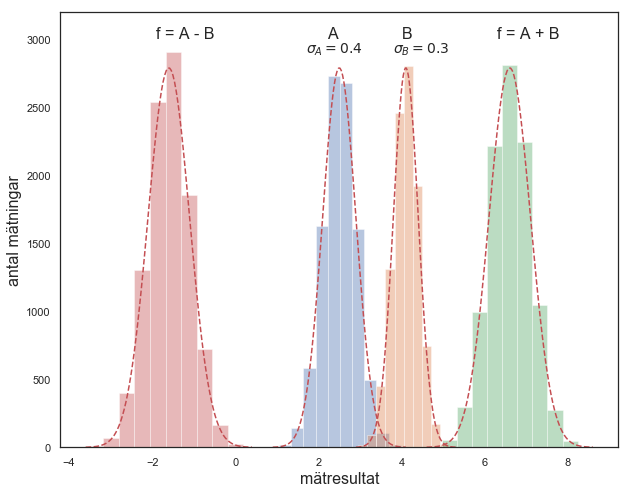

---------------RESULTAT---------------
Standardavvikelsen för A - B = 0.50012
Standardavvikelsen för A + B = 0.49575
Teoretisk standardavvikelse = 0.5
--------------------------------------


In [4]:
# Addition och differens 
# skapa simulerad mätdata
N = int(1e4) # antal mätningar av of parameterna

A_mu = 2.5; A_sigma = 0.4
B_mu = 4.1; B_sigma = 0.3
random.seed(10)

# här ser vi ett annat sätt att dra normalfördelade 
# slumptal
A = random.normal(A_mu, A_sigma, size=N)
B = random.normal(B_mu, B_sigma, size=N)

# skapa resultat av addition och differensen
p = A + B
m = A - B

# generera histogram av mätdata 

figure(2, figsize=(10,8))
sns.distplot(A, kde=False, bins=10)
sns.distplot(B, kde=False, bins=10)

sns.distplot(p, kde=False, bins=10)
sns.distplot(m, kde=False, bins=10)


# Använd numpy.std för att ta fram standardavvikelserna 
samb = round(std(m),5)
sapb = round(std(p),5)

# regel för addition och differens av felgränser
tsigma = sqrt(A_sigma**2 + B_sigma**2)

# skapa teoretiska normalfördelningskurvor
amp = 3500
xtA = linspace(0,5,100)
xtB = linspace(1,6,100)

xt1 = linspace(4,10,100)
xt2 = linspace(-4,2,100)

# plotta upp teoretiska kurvor
gcurve(2800, my=A_mu, width=A_sigma)
gcurve(2100, my=B_mu, width=B_sigma)
gcurve(amp, my=A_mu+B_mu, width=tsigma)
gcurve(amp, my=A_mu-B_mu, width=tsigma)


# lägg till förklaringstext
annotate(r'$\sigma_A = 0.4$', xy=(1.7, 2900), fontsize=14)
annotate(r'$\sigma_B = 0.3$', xy=(3.8, 2900), fontsize=14)
annotate('A', xy=(2.2, 3010), fontsize=16)
annotate('B', xy=(4.0, 3010), fontsize=16)
annotate('f = A - B', xy=(A_mu - B_mu-0.3, 3010), fontsize=16)
annotate('f = A + B', xy=(A_mu + B_mu-0.3, 3010), fontsize=16)

ylim(0,3200)
ylabel('antal mätningar', fontsize=16)
xlabel('mätresultat', fontsize=16)
show()

# printa ut resultatet
print(15*'-'+'RESULTAT'+15*'-')
print(f'Standardavvikelsen för A - B = {samb}')
print(f'Standardavvikelsen för A + B = {sapb}')
print(f'Teoretisk standardavvikelse = {tsigma}')
print(38*'-')

### $f(x) = Ax$: multiplikation med exakt konstant
För funktion med konstant utan osäkerhet blir ekv. (8): $s_f = |A|s_x$.

Vi använder sambandet för lägesenergi, *E = mgh*, med *m* = 1.00 kg, *g* = 9.82 N/kg och *h* = 10.0 $\pm$ 0.01 m. Massan och tyngdaccelerationen antas ha exakt värde. Vi jämför teoretisk resultat med MC-simulering utan graf.

In [5]:
# Potentiella energin E = mgh

h_mu = 10.0
h_sigma = 0.01
m = 1.00
g = 9.82

# skapa MC-data
random.seed(100) #så att vi alltid får samma i denna notebook
h = random.normal(h_mu, h_sigma, size=N)
E = h * m * g
tsigma = round(m*g*h_sigma, 4)

# skriv ut resultat
print(15*'-'+'RESULTAT'+15*'-')
print(f'MC mgh = {round(average(E), 3)} J')
print(f'MC Standardavvikelsen för mgh = {round(std(E), 4)}')

print(f'Teoretisk mgh = {h_mu*m*g} J')
print(f'Teoretisk standardavvikelse = {tsigma}')
print(38*'-')


---------------RESULTAT---------------
MC mgh = 98.2 J
MC Standardavvikelsen för mgh = 0.0988
Teoretisk mgh = 98.2 J
Teoretisk standardavvikelse = 0.0982
--------------------------------------


### $f(x) = xy , x/y$: multiplikation och division

För en funktion, $f(x,y) = xy$ (*eller $f(x,y) = x/y$*), av en parameter multiplicerat eller dividerat med en eller flera parameter, där vi känner deras standardavvikelser, så kan vi se från ekv. (8) att variansen av $(s_f)^2 = y^2 s_x^2 + x^2 s_y^2$.

Division med $f^2 = (xy)^2$ på båda sidorna ger: 
$(s_f)^2/f^2 = (y^2/(x^2y^2))s_x^2 + (x^2/(x^2y^2))s_y^2$

$ (s_f)^2/f^2 = s_x^2/x^2 + s_y^2/y^2$

I exemplet nedan har vi en funktion, *A = Fx*, med *F* = 25.0 $\pm $ 0.5 N och *x* = 6.4 $\pm$ 0.1 m, och vi vill bestämma arbetet med standardavvikelse.

In [6]:
# multiplikation och division

F_mu = 25.0
F_sigma = 0.5
x_mu = 6.4
x_sigma = 0.1
N = 10000

# MC-simulering
F = random.normal(F_mu, F_sigma, size=N)
x = random.normal(x_mu, x_sigma, size=N)
A = F * x

# Skriv ut MC-resultat
print(17*'-'+'RESULTAT'+17*'-')
print(f'MC medelvärde: {round(average(A),3)} J')
print(f'MC Standardavvikelse: {round(std(A), 4)}')

# Teoretisk
AT = F_mu*x_mu
sigmat = round(sqrt((F_sigma / F_mu)**2 + (x_sigma / x_mu)**2) * F_mu * x_mu, 4)
print(f'Teoretisk medelvärde = {AT} J')
print(f'Teoretisk standardavvikelse = {sigmat}')

print(42*'-')

-----------------RESULTAT-----------------
MC medelvärde: 160.003 J
MC Standardavvikelse: 4.0488
Teoretisk medelvärde = 160.0 J
Teoretisk standardavvikelse = 4.0608
------------------------------------------


Vi kan också gå tillbaka till vårt första exempel med spänning som funktion av töjningen och E-modul enligt: $\sigma$ = *E*$\varepsilon$.
Enligt ovan så förväntar vi oss att kvadraten av relativa osäkerheten ges av summan av kvadraterna av osäkerheterna: $(s_\sigma/\sigma)^2 = (s_E/E)^2 + (s_\varepsilon/\varepsilon)^2 \iff s_\sigma = \sigma\sqrt{(s_E/E)^2 + (s_\varepsilon/\varepsilon)^2}$ 

Med *E* = 200 MPa $\pm$ 5, $\varepsilon$ = 0.1 $\pm$ 0.01 så får man: $\sigma$ = 20.0 $\pm$ 2.06 MPa (se nedan), att jämföra med $\pm$2.5 MPa när man använde direkt differentiering. *Obs! I detta exempel så har vi använt $\pm$ en standardavvikelse som felgränserna.*

In [7]:
# mekanisk spänning

E = 200 #E-modul
sigma_E = 5
e = 0.1 #töjning
sigma_e = 0.01

print(17*'-'+'RESULTAT'+17*'-')
print(f'Spänningen = {E*e} MPa')

# beräkna spänningen
s = E*e
sigma_s = s*sqrt((sigma_E/E)**2 + (sigma_e/e)**2)
print(f'Totala standardavvikelsen = {round(sigma_s, 2)} MPa')
print(42*'-')

-----------------RESULTAT-----------------
Spänningen = 20.0 MPa
Totala standardavvikelsen = 2.06 MPa
------------------------------------------


### $f(x) = Cx^A$: Potensfunktioner
För uttryck där funktionen beror på en variabel, med känd osäkerhet eller standardavvikelse, upphöjt till någon exakt konstant, så ges totala relativa osäkerheten av $s_f/f = |A|\cdot s_x/x$. 

Om vi börjar med ett uttryck som i rubriken: $f(x) = Cx^A$. Derivatan med avseende på *x* ger: $df/dx = ACx^{A-1}$. 

Dividera ekv. (8) med $f^2=C^2X^{2A}$ på båda sidorna ger: $s_f^2/f^2 = A^2C^2x^{2A-2}/C^2x^{2A}\cdot s_x^2 = A^2\cdot s_x^2/x^2 \iff s_f/f = |A|s_x/x$.

Låt oss beräkna periodtiden, *T*, för en pendel som funktion av pendelns längd, $l$: $T = 2\pi\sqrt{\frac{l}{g}}$, där $l$ = 0.25 $\pm$0.005 m, $g$ = 9.82 m/s$^2$. Vi kan tänka oss att längden varierar pga. temperaturvariationer i dess omgivning. Vi ser ifrån simuleringen och teorin att vi kan förvänta oss en period på 1.002 s med en standardavvikelse på: $s_T$ = 0.5$\cdot$ *T*$\cdot s_x/x$ = 0.5$\cdot$ 1.00 $\cdot$ 0.005/0.025 = 0.010 s.

In [8]:
## Periodtid för pendel

#MC-simulering
g = 9.82
l_mu = 0.25
l_sigma = 0.005
N = 10000 # antal mätningar
l = random.normal(l_mu, l_sigma, size=N)
T = (2*pi/sqrt(g))*l**(0.5)

# skriv ut MC-resultat
print(17*'-'+'RESULTAT'+17*'-')
print(f'MC medelvärde: {round(average(T),4)} s')
print(f'MC Standardavvikelse: {round(std(T), 5)}')

#teoretisk sigma
Tt = round(2*pi/sqrt(g)*l_mu**(0.5),5)
sigma_T = round(0.5*average(T)*l_sigma/l_mu, 5)
print(f'Teoretisk medelvärde = {Tt} s')
print(f'Teoretisk standardavvikelse = {sigma_T}')

print(42*'-')

-----------------RESULTAT-----------------
MC medelvärde: 1.0025 s
MC Standardavvikelse: 0.01
Teoretisk medelvärde = 1.00252 s
Teoretisk standardavvikelse = 0.01002
------------------------------------------


### $f(x) = log(x)$: logaritmiska funktioner
När det kommer till logaritmiska funktionen av typen, f(x) = log$_{10}$(x), så blir det något annorlunda. På grund av det logaritmiska beteendet så kommer felgränserna att variera inverst propotionelt mot x. Vi kan se detta på följande vis.

Vi använder först att log$_a$(x) = ln(x)/ln(a).
Differentiering av den funktionen och insättning i ekv (8) leder till: $s_f$ = 1/|x|$\cdot$ 1/ln(10)$\cdot s_x$ = 0.434 $s_x$/|x|.

Från histogrammen i första figuren nedan är det tydligt att, även om vi har samma osäkerhet, $\sigma_x$ = 0.5, för x i alla tre fallen, så ökar spridningen för log$_{10}$(x) när x minskar. I 2:a figuren plottar vi log$_{10}$(x) mot x och vi har dessutom adderat felgränserna $\pm$ 2 standardavvikelse runt varje punkt. I den figuren är det tydligt hur felgränserna ökar när variabeln går mot noll.

-----------------RESULTAT-----------------
MC medelvärde 1: 		 0.6956 
Teoretisk medelvärde 1:		 0.699 

MC Standardavvikelse 1: 	 0.04387
Teoretisk standardavvikelse 1:	 0.0434

----------

MC medelvärde 2:		0.9995 
Teoretisk medelvärde 2:		1.0 

MC Standardavvikelse 2:		0.02167
Teoretisk standardavvikelse 2:	0.0217

----------

MC medelvärde 3:		1.3009 
Teoretisk medelvärde 3:		1.301 

MC Standardavvikelse 3:		0.01079
Teoretisk standardavvikelse 3:	0.0109
------------------------------------------


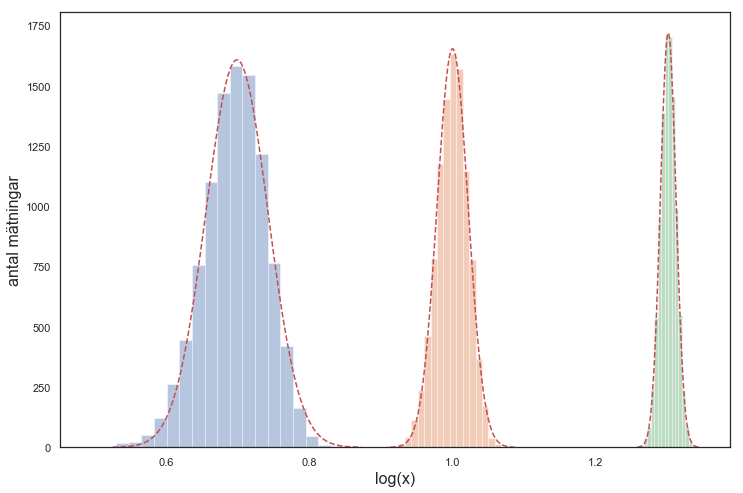

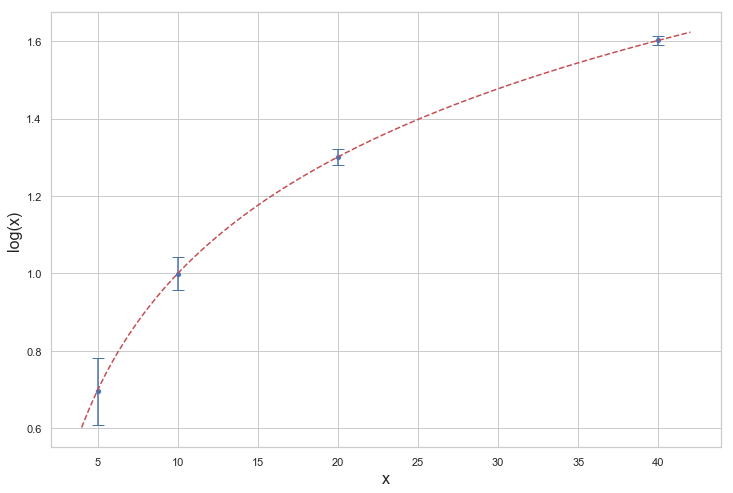

In [9]:
# logaritmiska funktioner

# tre olika medelvärden
my_p1 = 5.0
my_p2 = 10.0
my_p3 = 20.0

# gemensam standardavvikelse
sigma_p = 0.5

# antal mätningar
N = 10000

# MC-simulering
random.seed(3)
p1 = random.normal(my_p1, sigma_p, size=N)
p2 = random.normal(my_p2, sigma_p, size=N)
p3 = random.normal(my_p3, sigma_p, size=N)

f1 = log10(p1)
f2 = log10(p2)
f3 = log10(p3)

f1_av = round(average(f1), 4)
f2_av = round(average(f2), 4)
f3_av = round(average(f3), 4)

# plotta histogram för de tre dataseten
figure(3, figsize=(12,8))

sns.distplot(f1, kde=False, bins=20)
sns.distplot(f2, kde=False, bins=20)
sns.distplot(f3, kde=False, bins=20)

# teoretiska standardavvikelser
s_f1 = round((1/my_p1)*sigma_p/log(10),4)
s_f2 = round((1/my_p2)*sigma_p/log(10),4)
s_f3 = round((1/my_p3)*sigma_p/log(10),4)
s_f4 = round((1/40.)*sigma_p/log(10),4)

# teoretiska funktionsvärden
f1t = round(log10(my_p1), 4)
f2t = round(log10(my_p2), 4)
f3t = round(log10(my_p3), 4)

# plotta teoretiska fördelningskurvor i samma figur
gcurve(175, my=f1t, width=s_f1)
gcurve(90, my=f2t, width=s_f2)
gcurve(47, my=f3t, width=s_f3)
xlabel('log(x)', fontsize=16)
ylabel('antal mätningar', fontsize=16)

# ny figur för datapunkter
figure(4, figsize=(12,8))

# använd seaborn för att ändra utseende på plot
sns.set(style='whitegrid')

# scatterplot för datapunkterna
sns.scatterplot([my_p1, my_p2, my_p3, 40.],[f1_av, f2_av, f3_av, log10(40)])

xl = linspace(4, 42, 100)
plot(xl, log10(xl), 'r--') #teoretisk kurva

# errorbar för att addera felgränser, 2xstandardavvikelser
errorbar([my_p1, my_p2, my_p3, 40.],[f1_av, f2_av, f3_av, log10(40)], yerr=[2*s_f1, 2*s_f2, 2*s_f3, 2*s_f4],
         fmt=' ',
         capsize=6)
xlabel('x', fontsize=16)
ylabel('log(x)', fontsize=16)

#Skriv ut alla resultat
print(17*'-'+'RESULTAT'+17*'-')
print(f'MC medelvärde 1: \t\t {f1_av} ')
print(f'Teoretisk medelvärde 1:\t\t {f1t} \n')
print(f'MC Standardavvikelse 1: \t {round(std(f1), 5)}')
print(f'Teoretisk standardavvikelse 1:\t {s_f1}\n')
print(10*'-'+'\n')

print(f'MC medelvärde 2:\t\t{f2_av} ')
print(f'Teoretisk medelvärde 2:\t\t{f2t} \n')
print(f'MC Standardavvikelse 2:\t\t{round(std(f2), 5)}')
print(f'Teoretisk standardavvikelse 2:\t{s_f2}\n')
print(10*'-'+'\n')

print(f'MC medelvärde 3:\t\t{f3_av} ')
print(f'Teoretisk medelvärde 3:\t\t{f3t} \n')
print(f'MC Standardavvikelse 3:\t\t{round(std(f3), 5)}')
print(f'Teoretisk standardavvikelse 3:\t{s_f3}')

print(42*'-')

### Sammansatta funktioner - Case study
Genom att kombinera de olika standardfallen så kan man oftast ta fram felgränser för även de mest komplicerade funktioner. Ett tips är dock att faktisk utföra en MC-simulering för att vara på den säkra sidan.

I exemplet nedan så har vi en galvanisk cell för följande reaktion:
Cu(s) + 2Ag$^{+} \rightarrow$ Cu$^{2+}$ 2Ag(s)
vill vi ta fram cellpotentialen med hjälp av Nernst Ekvation: 
$$ E = E^\circ - \frac{RT}{nF}\cdot \text{ln}\frac{[Cu^{2+}]}{[Ag^+]^2}, $$ där *n* = 2, är antalet elektroner som byter plats, *R* = 8.314 J$\cdot$ mol$^{-1}$K$^{-1}$, och *F* = 9.6485$\cdot$10$^{4}$ C$\cdot$ mol$^{-1}$.

Vi har mätt upp koncentrationerna till: [Ag$^+$] = 0.05 $\pm$ 0.005 M, [Cu$^{2+}$] = 0.10 $\pm$ 0.03  M och temperaturen är känd, *T* = 298 $\pm$ 0.5 K.  $E^\circ$ för denna cell är 1.14 V. Vi använder att felgränserna är satta som $\pm$ 2$\sigma$.

MC-simulering visar att vi förväntar oss ett medelvärde på cellpotentialen på *E* = 0.67 $\pm$ 0.05 V 

### Övningsuppgifter
1. Beräkna teoretiska standardavvikelsen (dvs. $\sigma_E$) och använd denna för att plotta en graf med teoretisk kurva som överlappar histogrammet.
2. Ta fram en funktion som använder som input olika koncentrationer och relativa fel (dvs. $\sigma_{cCu}$/*cCu* osv.) för koppar och silverjonkoncentrationerna. Därefter plotta en graf med 3 - 5 st. olika sådana kombinationer samt deras felgränser, liknande den figur som visades i förra avsnittet?

-----------------RESULTAT-----------------
MC standardavvikelse: 	s_E =  0.024 V 
MC medelvärde: 		E = 0.668 +- 0.048 V 
------------------------------------------


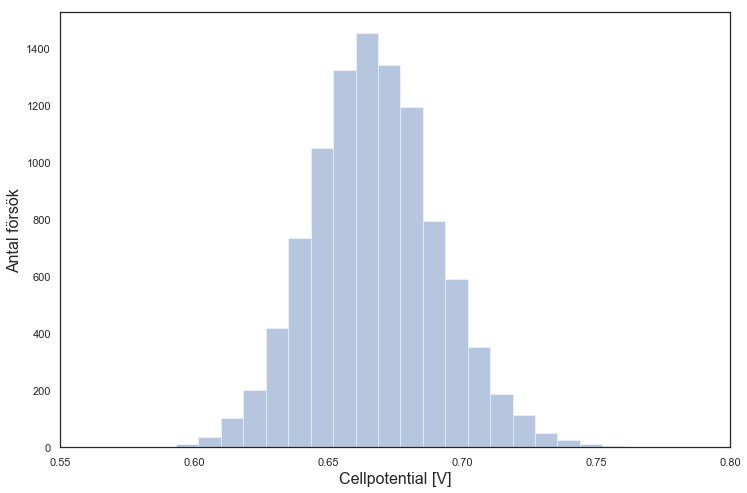

In [10]:
# galvanisk cell

# kända värden och konstanter
E0 = 1.14
T_mu = 298
T_sigma = 0.5/2.
cCu_mu = 0.10
cCu_sigma = 0.03/2.
cAg_mu = 5.0E-2
cAg_sigma = (5.0E-3)/2.
R = 8.314
Far = 9648.5

# MC-simulering
N = 10000
random.seed(12)
T = random.normal(T_mu, T_sigma, size=N)
cCu = random.normal(cCu_mu, cCu_sigma, size=N)
cAg = random.normal(cAg_mu, cAg_sigma, size=N)

E = E0 - (R*T)/(2*Far)*log(cCu/cAg**2)
E_av = average(E)
E_std = std(E)

# plotta histogram 
figure(8, figsize=(12,8))
sns.set(style='white')
sns.distplot(E, kde=False, bins=20)
xlabel('Cellpotential [V]', fontsize=16)
ylabel('Antal försök', fontsize=16)
xlim([0.55, 0.8])

#Skriv ut alla resultat
print(17*'-'+'RESULTAT'+17*'-')
print(f'MC standardavvikelse: \ts_E =  {round(E_std, 3)} V ')
print(f'MC medelvärde: \t\tE = {round(E_av, 3)} +- {2*round(E_std, 3)} V ')

print(42*'-')

-----------------RESULTAT-----------------
MC standardavvikelse: 	s_E =  0.024 V 
MC medelvärde: 		E = 0.668 +- 0.048 V 

Teoretisk standardavvikelse: 	s_E = 0.023 V
Teoretisk medelvärde:	E = 0.666 +- 0.046 V
------------------------------------------


[None]

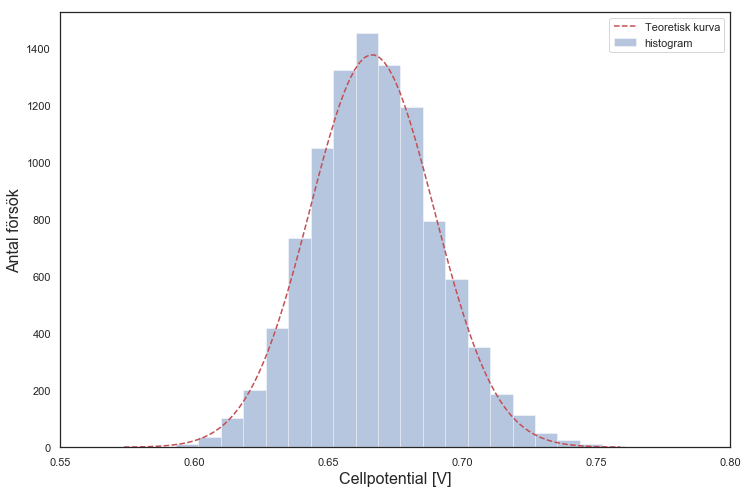

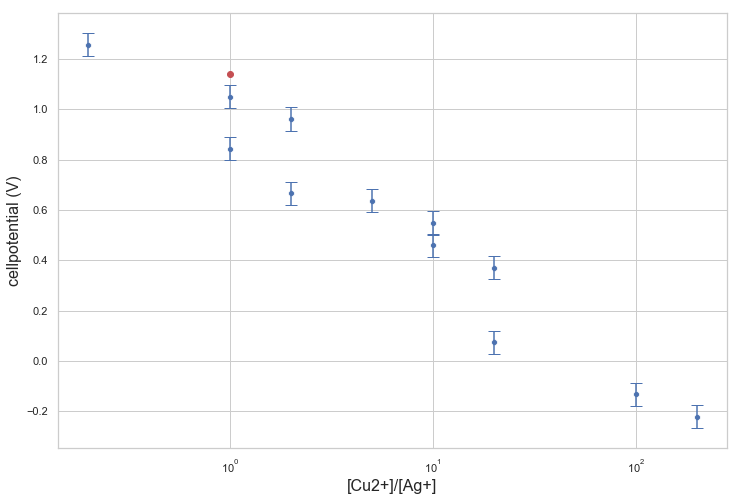

In [11]:
#lösning på övningsuppgift

def Esigma(ccuovercag, sccuoverccu, scagovercag):
        '''funktion som beräknar standardavvikelsen
        för cellpotentialen som funktion av
        s_cCu/cCu och s_cAg/cAg'''
        T = T_mu
        a = R/(2*Far)
        sigma_E = sqrt(a**2*((log(ccuovercag)*T_sigma)**2 + 
                         (T*sccuoverccu)**2 +
                         (2*T*scagovercag)**2))
        return sigma_E

# Sätt konstanter och startvärden 
E0 = 1.14 #cellpotentialen vid 1M och 1 bar.
T_mu = 298 #25C
T_sigma = 1.0/2.
cCu_mu = 0.10
cCu_sigma = 0.03/2.
cAg_mu = 5.0E-2
cAg_sigma = (5.0E-3)/2.
R = 8.314  #universella gaskonstanten
Far = 9648.5 #Faradays konstant

# vi låter kvoterna vara konstanta denna gång.
sccuoverccu = cCu_sigma/cCu_mu
scagovercag = cAg_sigma/cAg_mu

# Ett par olika koncentrationer som vi räknar på
listofcCu = [0.10, 0.50, 1.0]
listofcAg = [ 5.0E-3, 5.0E-2, 0.10, 0.5]

s_E =[]
Es = []
ccuocags = []

# loopa över konc Cu och Konc Ag
for cCu in listofcCu:
    for cAg in listofcAg:
        ccuocag = cCu/cAg #används som x i grafen senare
        ccuocag2 = cCu/(cAg**2) #behövs i Esigma
        ccuocags.append(ccuocag)
        # felgränser = +- 2sigma
        s_E.append(2*Esigma(ccuocag2, sccuoverccu, scagovercag))
        #lista med cellpotentialer
        Es.append(E0 - (R*T_mu)/(2*Far)*log(cCu/(cAg**2)))

# teoretisk standardavvikelse från ekvation 7
s_E = sqrt((R/(2*Far))**2*((log(cCu_mu/cAg_mu**2)*T_sigma)**2 + 
                         (T_mu*cCu_sigma/cCu_mu)**2 +
                         (2*T_mu*cAg_sigma/cAg_mu)**2))

#Teoretiskt cellpotential
Et = E0 - (R*T_mu)/(2*Far)*log(cCu_mu/cAg_mu**2)

#Skriv ut alla resultat med svar på uppgift 1
print(17*'-'+'RESULTAT'+17*'-')
print(f'MC standardavvikelse: \ts_E =  {round(E_std, 3)} V ')
print(f'MC medelvärde: \t\tE = {round(E_av, 3)} +- {2*round(E_std, 3)} V ')

print(f'\nTeoretisk standardavvikelse: \ts_E = {round(s_E, 3)} V')
print(f'Teoretisk medelvärde:\tE = {round(Et, 3)} +- {2*round(s_E, 3)} V')
print(42*'-')

# plotta histogram, samma som tidigare
figure(20, figsize=(12,8))
sns.set(style='white')
sns.distplot(E, kde=False, bins=20)
gcurve(80, Et, s_E)
xlabel('Cellpotential [V]', fontsize=16)
ylabel('Antal försök', fontsize=16)
xlim([0.55, 0.8])
legend(['Teoretisk kurva', 'histogram'])

# skapa figur med resultat
sns.set(style='whitegrid')
figure(9, figsize=(12,8))
sfig = sns.scatterplot(ccuocags, Es)

# en punkt för standardpotentialen
cu0 = 1.
ag0 = 1.
e0 = E0 - (R*T_mu)/(2*Far)*log(cu0/(ag0**2))
plot(cu0/ag0, e0, 'ro')

# errorbar genererar felgränser
errorbar(ccuocags,Es, yerr=2*s_E,
         fmt=' ',
         capsize=6)
xlabel('[Cu2+]/[Ag+]',fontsize=16)
ylabel('cellpotential (V)', fontsize=16)

# logaratmisk skala på x-axeln
sfig.set(xscale='log')


## Kurvanpassning med felgränser
Ofta har man data man vill kunna anpassa med någon funktion, t.ex. ett polynom $y(x) = p_0x^k + p_1x^{k-1}+\dots+ p_{k}$. I princip så skall man då ta fram något som kallas kovariansmatrisen mellan de sökta parameterna, vilket beskriver hur mycket parameterna är korrelerade. Från denna så kan man bestämma standardfelet. Precis som för medelvärdet så bestämmer man standardfelet för flera parameter genom att dividera standardavvikelsen med $\sqrt{n - k}$ när *n* är antalet mätpunkter och *k* antalet parameter. Slutligen multiplicerar standardfelet med Student-T-faktorn för antal frihetsgrader och den satta konfidensnivån $\alpha$.

### NumPy.polyfit och Scipy.stats.distribution.t
I exemplet nedan anpassar vi mätdata för sträckan som funktion av tiden på ett objekt som kastas uppåt, med ett 2:a-gradspolynom $y = p_0x^2 + p_1x + p_2$ med hjälp av numpys polyfit. Vi utgår ifrån den fysikaliska modellen Newtons rörelseekvation: $s(t) = s_0 + v_0t + \frac{at^2}{2}$ och försöker experimentellt ta fram starthöjden, starthastigheten och accelerationen samt deras felgränser. För felgränserna tar vi hjälp av SciPy-bibliotekets Student-T-fördelningsverktyg.

-----------------RESULTAT-----------------
Kurvanpassningens ekvation
s(t) = -4.67t^2 + 7.64t + 1.16

Parameterna med 95% konfidensinterval
a/2 = -4.67 +- 0.35 m/s^2
v0 = 7.64 +- 0.64 m/s
s0 = 1.16 +- 0.24 m
------------------------------------------


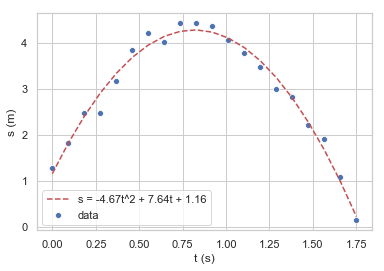

In [12]:
# polyfit av fritt fall

# generera data
random.seed(20)
N = 5

n = 20
tid = linspace(0, 1.75, n)
v0 = 8.0
s0 = 1.1
a = 9.82

#f = -0.5at^2 + v0*t + s0
f = -0.5*a*tid**2 + 8.0*tid + 1.1

# lägg till noise
y0 = 0
sigma = 0.2
noise = random.normal(y0, sigma, tid.shape)
f += noise
sns.scatterplot(tid,f)

# utför kurvanpassning till 2:a ordningens polynom
k = 2
# f = p[0]t^2 + p[1]t + p[2]
# V är covariansmatrisen
[p, V] = polyfit(tid, f, deg=k, cov=True)

# plotta kurvanpassningen
# poly1d skapar en funktion från p, som i sin tur
# tar x värden och genererar funktionsvärden.
f_t = poly1d(p)
plot(tid, f_t(tid), 'r--')
xlabel('t (s)')
ylabel('s (m)')
funkfit = 's = {:2.2f}t^2 + {:2.2f}t + {:2.2f}'.format(p[0],p[1],p[2])
legend([funkfit,'data'])

print(17*'-'+'RESULTAT'+17*'-')
print('Kurvanpassningens ekvation')
print(f's(t) = {round(p[0], 2)}t^2 + {round(p[1], 2)}t + {round(p[2],2)}\n')

# kvadratroten ur diagonalerna i kovariansmatris ger standardfelet (SE)
SE = sqrt(diag(V))

#  95% Konfidensintervall ges av Student-T-faktor x SE
from scipy.stats.distributions import t

st = t.ppf(1 - 0.05/2., n-(k+1))
CI = st*SE

print('Parameterna med 95% konfidensinterval')
print(f'a/2 = {round(p[0], 2)} +- {round(CI[0], 2)} m/s^2')
print(f'v0 = {round(p[1], 2)} +- {round(CI[1],2)} m/s')
print(f's0 = {round(p[2], 2)} +- {round(CI[2],2)} m')
print(42*'-')

### Kurvanpassning och dataanalys med lmfit
Det finns ett väldigt användbart python-bibliotek, lmfit, som gör mycket av jobbet åt oss, särskilt när det gäller att ta fram kurvanpassningar med felgränser. Vi använder samma data som i förra exemplet och ser hur lmfit skulle utföra samma analys. Lmfit använder sig av SciPy:s minimeringsfunktioner i de flesta fallen och det finns väldigt många färdiga lösningar och modellfunktioner som man kan använda sig av.

Eftersom vi vet att vår data borde passa en parabolisk andragradspolynom importerar vi den inbygda andragradsmodellen QudraticModel. I detta exempel importerar vi också data-hanteringsbiblioteket Pandas vilket underlättar hanteraring av data och analysen i många fall. lmfit har många färdiga funktionstyper, både för att anpassa toppar och för olika typer av funktioner som polynom, exponentialfunktioner och så vidare. QudraticModel är alltså bara en av dessa inbyggda färdiga modellfunktioner i lmfit.

Vi skapar en databas med vår data ifrån förra exemplet. Det går också bra att importera data ifrån en csv-fil och även nära datan är sparad i binär form. I exemplet låter vi lmfit gissa startvärden och därefter utför vi vår kurvanpassning. lmfit levereras med en inbygd resultatplot och resultatrapport-funktion vilket gör att vi får ut information på ett överskådligt vis utan ansträngning. 

Vi kan jämföra med vår egen analys från förra exemplet och ser att 95%:iga konfidensintervallen matchar varandra väl.

[[Model]]
    Model(parabolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 20
    # variables        = 3
    chi-square         = 0.59866660
    reduced chi-square = 0.03521568
    Akaike info crit   = -64.1756540
    Bayesian info crit = -61.1884572
[[Variables]]
    a: -4.67067063 +/- 0.16694998 (3.57%) (init = -4.670671)
    b:  7.64154210 +/- 0.30265693 (3.96%) (init = 7.641542)
    c:  1.15872780 +/- 0.11426829 (9.86%) (init = 1.158728)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.965
    C(b, c) = -0.840
    C(a, c) =  0.706
------------------------------Konfidensintervall------------------------------
      99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 a:  -0.58560  -0.36033  -0.17202  -4.67067  +0.17202  +0.36033  +0.58560
 b:  -1.06161  -0.65322  -0.31186   7.64154  +0.31186  +0.65322  +1.06161
 c:  -0.40079  -0.24663  -0.11774   1.15873  +0.11774  +0.24663  +0.40081


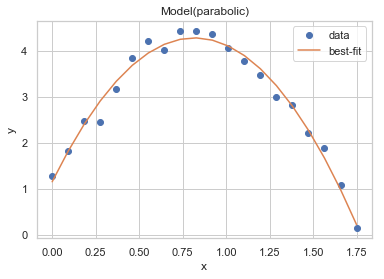

In [13]:
from lmfit.models import QuadraticModel
import pandas as pd

model = QuadraticModel()

# skapa ett Pandas DataFrame-objekt
# med samma data som i föregående exempel
df1 = pd.DataFrame({"s":f,
                    "t":tid})

# De inbygda modellerna har möjlighet att generera
# startgissning på parameterna
params = model.guess(df1["s"], x=df1["t"])

# Utför kurvanpassningen
results = model.fit(df1['s'], params, x=df1['t'])

# Plotta och skriv ut en rapport med konfidensintervall
results.plot_fit()
print(results.fit_report())
print(30*'-'+'Konfidensintervall'+30*'-')

# vi kan även skriva ut en fulltständig konfidensintervall-
# rapport.
print(results.ci_report())

### lmfit med egen funktion
Det är också väldigt lätt att definiera egna funktioner och låta lmfit utföra jobbet och analysen. I exemplet nedan skapar vi "mätdata", visar hur man sparar till csv-fil, hur man kan läsa in data med hjälp av pandas-bilblioteket eller numpy, och slutligen hur man utför analysen med lmfit. När man gör på detta vis så måste man skapa en funktion som skall minimeras och för enkelhetens skull gör vi om mätdatan till numpy-array då det underlättar när vi använder vår egen funktion.

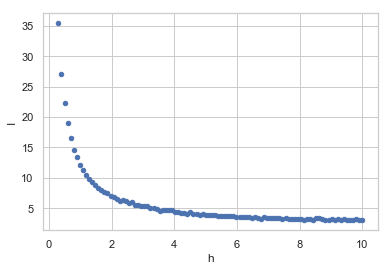

In [14]:
# lmfit egen funktion del1: skapa data
import pandas as pd

# generera simulerad data
tim = linspace(0.3, 10, 100)
np.random.seed(0)
I = 1/(0.1*tim) + 2 + 0.1*np.random.randn(tim.size)

# skapa pandas-objekt av data
df1 = pd.DataFrame({"I":I,
                    "h":tim})

# ni kan skriva df1 för att se hur fint pandas
# presenterar data

# visa och spara data som csv-fil
df1.to_csv('egendata.csv', index=False)

# pandas levereras också med en plotfunktion.
df1.plot(kind="scatter", x="h", y="I")

[[Model]]
    Model(minfunktion)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 100
    # variables        = 2
    chi-square         = 0.93618187
    reduced chi-square = 0.00955288
    Akaike info crit   = -463.111571
    Bayesian info crit = -457.901230
[[Variables]]
    a:  0.09943896 +/- 1.9322e-04 (0.19%) (init = 0.1)
    b:  1.98476942 +/- 0.01222678 (0.62%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) =  0.601
------------------------------Konfidensintervall------------------------------
      99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 a:  -0.00059  -0.00039  -0.00019   0.09944  +0.00019  +0.00039  +0.00060
 b:  -0.03766  -0.02478  -0.01230   1.98477  +0.01230  +0.02478  +0.03761


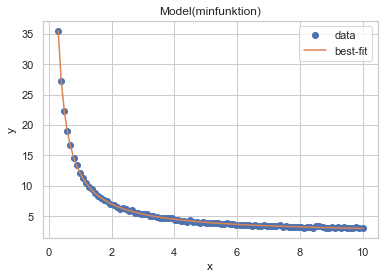

In [15]:
# lmfit egen funktion del 2: Importera data och analys
import lmfit
from lmfit import Model
import pandas as pd

# ladda data från csv-fil till numpy array mha pandas

# data = pd.read_csv('egendata.csv', decimal=',').to_numpy(dtype=float)
# Intensitet, TID = data[:,0], data[:,1]

# eller mha numpys funktion genfromtxt()
Intensitet, TID   = genfromtxt('egendata.csv', delimiter=',', skip_header=1, unpack=True)

# skapa en funktion som skall minimeras
def minfunktion(x, a, b):
    return 1/(a*x) + b

# låt lmfit skapa parameterna som söks och ange gissning
pars = lmfit.Parameters()
pars.add_many(('a', 0.1), ('b', 1))

# gör egen funktion till lmfit Model
model = Model(minfunktion)
result = model.fit(Intensitet, pars, x=TID)
result.plot_fit()
print(result.fit_report())
print(30*'-'+'Konfidensintervall'+30*'-')
print(result.ci_report())

## Avslutande ord
Vi har här försökt visa dels hur man kan hantera och beräkna felgränser och felfortplantning för olika siturationer och funktioner. Vi visade också hur man kan använda Python för dataanalys och hur man kan använda några av Pythons moderna bibliotek för att förenkla processen. Det finns väldigt många andra exempel och här i detta dokument så har bara några få tagits upp. Försök använda er av dessa för er egna data och är det något som är oklart så går det bra att fråga författaren.